# Erstellen einer Umsatzprognose
© Thomas Robert Holy 2019
<br>
Version 0.0.1
<br><br>
Visit me on GitHub: https://github.com/trh0ly

## Grundlegende Einstellungen

### Package Import

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline  
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import math

### Optikeinstellungen

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.width', 350)
plt.rcParams['figure.figsize'] = (12, 6) # macht die Plots größer

## Datensatz und Datensatzmanipulation

In [4]:
#-----------------------
# Amazon

quartals = ["Q1'07", "Q2'07", "Q3'07", "Q4'07", "Q1'08", "Q2'08", "Q3'08", "Q4'08", "Q1'09", "Q2'09",
            "Q3'09", "Q4'09", "Q1'10", "Q2'10", "Q3'10", "Q4'10", "Q1'11", "Q2'11", "Q3'11", "Q4'11",
            "Q1'12", "Q2'12", "Q3'12", "Q4'12", "Q1'13", "Q2'13", "Q3'13", "Q4'13", "Q1'14", "Q2'14",
            "Q3'14", "Q4'14", "Q1'15", "Q2'15", "Q3'15", "Q4'15", "Q1'16", "Q2'16", "Q3'16", "Q4'16",
            "Q1'17", "Q2'17", "Q3'17", "Q4'17", "Q1'18", "Q2'18", "Q3'18", "Q4'18", "Q1'19", "Q2'19"]

revenues = [3.02, 2.89, 3.26, 5.67, 4.14, 4.06, 4.26, 6.7, 4.89, 4.65, 5.45, 9.52, 7.13, 6.57, 7.56,
            12.95, 9.86, 9.91, 10.88, 17.43, 13.19, 12.83, 13.81, 21.27, 16.07, 15.7, 17.09, 25.59,
            19.74, 19.34, 20.58, 29.33, 22.72, 23.19, 25.36, 35.75, 29.13, 30.4, 32.71, 43.74, 35.71,
            37.96, 43.74, 60.5, 51.04, 52.89, 56.58, 72.38, 59.7, 63.4]

print(len(quartals))
print(len(revenues))

#-----------------------
# DataFrame erstellen

rev_DF = pd.DataFrame({'Revs':revenues, 'Quart':range(1,len(revenues) + 1)})
rev_DF.head()

50
50


,Revs,Quart
0,3.02,1
1,2.89,2
2,3.26,3
3,5.67,4
4,4.14,5


### DataFrame plotten

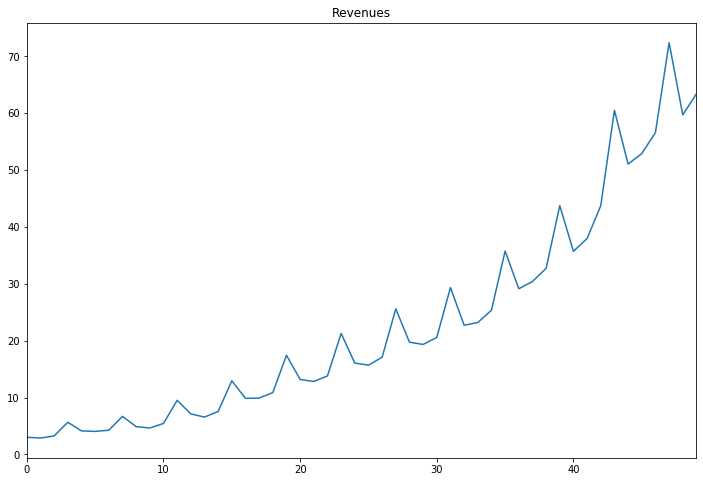

In [5]:
rev_DF.Revs.plot(figsize=(12,8), title= 'Revenues', fontsize=10)

## Definition einige Hilfsfunktionen

### Moving-Average

In [6]:
def moving_average(k, array, weights=None):
    
    if weights == None:
        z_liste = []
        for i in range(k, len(array) - k):
            x = (i - k)
            y = (i + k + 1)
            z = np.mean(array[x:y])
            z_liste.append(z)
            
    if weights != None:
        z_liste, temp_liste = [], []
        for i in range(k, len(array) - k):
            x = (i - k)
            y = (i + k + 1)
            temp = array[x:y]
            temp_liste.append(temp)
            
        for i in temp_liste:
            for j in range(0, len(i)):
                i[j] = i[j] * weights[j]
            
        for i in temp_liste:
            i = np.mean(i)
            z_liste.append(i)
                   
    return z_liste    

### $\Delta t, \Delta z$ und $\Delta t \Delta z$

In [7]:
#-----------------------
# Delta t

def delta_t(t_array):
    mean_t = np.mean(t_array)
    
    delta_t_list = []
    for i in range(0, len(t_array)):
        delta_t = t_array[i] - mean_t
        delta_t_list.append(delta_t)
        
    delta_t_power_liste = []
    for i in delta_t_list:
        delta_t_power = np.power(i,2)
        delta_t_power_liste.append(delta_t_power)
        
    sum_delta_t_power_liste = np.sum(delta_t_power_liste)
    
    return delta_t_list, delta_t_power_liste, sum_delta_t_power_liste

#-----------------------
# Delta z

def delta_z(z_array, exp=False):
    mean_z = np.mean(z_array)
    
    if exp == False:
        delta_z_list = []
        for i in range(0, len(z_array)):
            delta_z = z_array[i] - mean_z
            delta_z_list.append(delta_z)
            
    if exp == True:
        delta_z_list = []
        for i in range(0, len(z_array)):
            delta_z = np.log(z_array[i]) - np.log(mean_z)
            delta_z_list.append(delta_z)
                 
    return delta_z_list

#-----------------------
# Delta t Delta z

def delta_z__delta_t(delta_t_list, delta_z_list):
    
    delta_zt_liste = []
    for i in range(0, len(delta_t_list)):
        delta_zt = delta_t_list[i] * delta_z_list[i]
        delta_zt_liste.append(delta_zt)        
    
    sum_delta_zt_liste = np.sum(delta_zt_liste)
    
    return delta_zt_liste, sum_delta_zt_liste

### Berechnung $a$ und $b$

In [8]:
def calc_ab(z_array, t_array, delta_zt_liste, sum_delta_t_power_liste):
    
    mean_z = np.mean(z_array)
    mean_t = np.mean(t_array)
       
    b = sum_delta_zt_liste / sum_delta_t_power_liste    
    a = mean_z - b * mean_t
    
    return a, b

### Prognose

In [9]:
def predict(a, b, array, exp=False):
    
    if exp == False:
        prediction_list = []
        for i in range(0, len(array)):
            prediction = a + b * array[i]
            prediction_list.append(prediction)
            
    if exp == True:
        prediction_list = []
        for i in range(0, len(array)):
            prediction = np.exp(a) * math.exp((b * array[i]))
            prediction_list.append(prediction) 
        
    return prediction_list

### Bestimmtheitsmaß

In [10]:
def r_power(z_array, prediction_list):
    
    mean_z = np.mean(z_array)
    
    a_list, b_list = [], []
    for i in range(0, len(z_array)):
        a = np.power((prediction_list[i] - mean_z), 2)
        a_list.append(a)
        
        b = np.power((z_array[i] - mean_z), 2)
        b_list.append(b)
        
    sum_a_list = np.sum(a_list)
    sum_b_list = np.sum(b_list)
    
    r_power = sum_a_list / sum_b_list
    
    return r_power

## Schrittweise Berechnung - Einfache lineare Regression

### $\Delta t$ und Summe $\Delta t$

In [11]:
t_array = rev_DF.Quart.values.tolist()

delta_t_list, delta_t_power_liste, sum_delta_t_power_liste = delta_t(t_array)
#print(delta_t_list, delta_t_power_liste, sum_delta_t_power_liste)

### $\Delta z$ und Summe $\Delta z$

In [12]:
z_array = rev_DF.Revs.values.tolist()

delta_z_list = delta_z(z_array)
#delta_z_list

### $\Delta t \Delta z$ und Summe $\Delta t \Delta z$

In [13]:
delta_zt_liste, sum_delta_zt_liste = delta_z__delta_t(delta_t_list, delta_z_list)
#print(delta_zt_liste, sum_delta_zt_liste)

### Parameter $a$ und $b$

In [14]:
a, b = calc_ab(z_array, t_array, delta_zt_liste, sum_delta_t_power_liste)
print(b, a)

1.186005282112845 -7.398334693877551


### Prognosewerte für die 1. bis letzte Periode

In [15]:
#prediction_for_list = range(1,13)
prediction_for_list = range(1,len(revenues) + 1)

prediction_list = predict(a, b, prediction_for_list)
#prediction_list

### DataFrame-Erweiterung und plotten der Prognosewerte

In [16]:
rev_DF['Pred'] = prediction_list

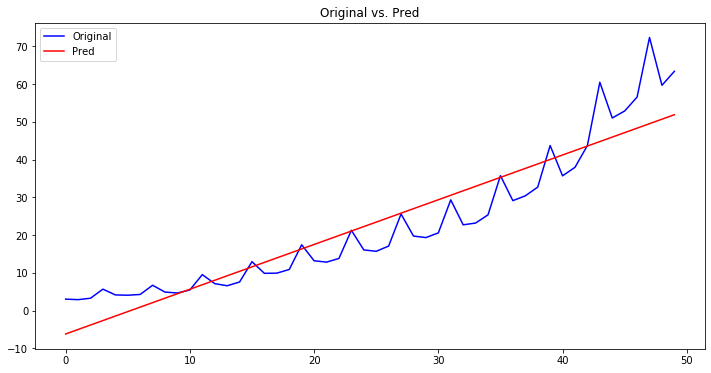

In [17]:
orig = plt.plot(rev_DF.Revs, color='blue', label='Original')
pred = plt.plot(rev_DF.Pred, color='red', label='Pred')
plt.legend(loc='best')
plt.title('Original vs. Pred')
plt.show()

### Bestimmtheitsmaß berechnen

In [18]:
r = r_power(z_array, prediction_list)
r

0.8568745095957687

## Schrittweise Berechnung unter Berücksichtigung nicht-linearer Zusammenhänge

### $\Delta t$ und Summe $\Delta t$

In [19]:
t_array = rev_DF.Quart.values.tolist()

delta_t_list, delta_t_power_liste, sum_delta_t_power_liste = delta_t(t_array)
#print(delta_t_list, delta_t_power_liste, sum_delta_t_power_liste)

### $\Delta z$ und Summe $\Delta z$

In [20]:
z_array = rev_DF.Revs.values.tolist()
#z_array = np.log(z_array)

delta_z_list = delta_z(z_array, exp=True)
#delta_z_list

### $\Delta t \Delta z$ und Summe $\Delta t \Delta z$

In [21]:
delta_zt_liste, sum_delta_zt_liste = delta_z__delta_t(delta_t_list, delta_z_list)
#print(delta_zt_liste, sum_delta_zt_liste)

### Parameter $a$ und $b$

In [22]:
a, b = calc_ab(np.log(z_array), t_array, delta_zt_liste, sum_delta_t_power_liste)
print(b, a)

0.06184618332291243 1.1837146521242945


### Prognosewerte für die 1. bis letze Periode

In [23]:
#prediction_for_list = range(1,13)
prediction_for_list = range(1,len(revenues) + 1)
z_array = z_array

prediction_list_exp = predict(a, b, prediction_for_list, exp=True)
#prediction_list_exp

### DataFrame-Erweiterung und plotten der Prognosewerte

In [24]:
rev_DF['Pred_exp'] = prediction_list_exp

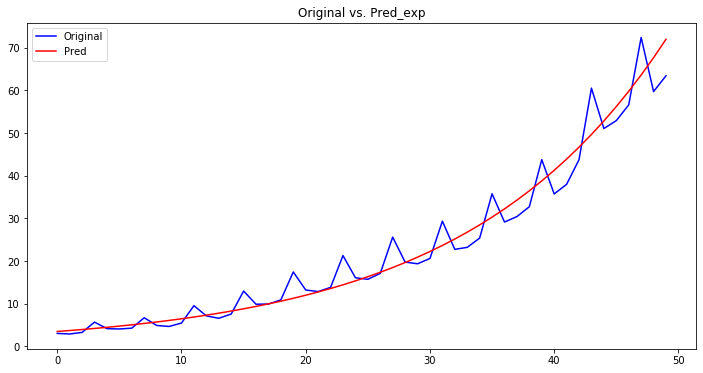

In [25]:
orig = plt.plot(rev_DF.Revs, color='blue', label='Original')
pred = plt.plot(rev_DF.Pred_exp, color='red', label='Pred')
plt.legend(loc='best')
plt.title('Original vs. Pred_exp')
plt.show()

### Bestimmtheitsmaß berechnen

In [26]:
r = r_power(z_array, prediction_list_exp)
r

1.0631618997382584

## Weitere Verbesserungen
### Definition weiterer Hilfsfunktionen
#### Berechnung des Residuums zwischen Moving-Average und Beobachtung

In [27]:
def calc_residual(rev, moving_average_list):
    
    cut_len = len(rev) - len(moving_average_list)
    start = int(cut_len / 2)
    end = int(len(rev) - cut_len / 2)    
    rev = rev[start:end]
    
    residual_list = []
    for i in range(0, len(rev)):
        residuum = rev[i] - moving_average_list[i]
        residual_list.append(residuum)
        
    return residual_list    

#### Berechnung mittlere quartalsweise Sainsonkopmponente

In [28]:
def get_seasonal_components(residual_list):
    
    quartal_1_list = []
    for i in range(0, len(residual_list), 4):
        quartal_1_list.append(residual_list[i])
     
    quartal_2_list = []
    for i in range(1, len(residual_list), 4):
        quartal_2_list.append(residual_list[i])
     
    quartal_3_list = []
    for i in range(2, len(residual_list), 4):
        quartal_3_list.append(residual_list[i])
     
    quartal_4_list = []
    for i in range(3, len(residual_list), 4):
        quartal_4_list.append(residual_list[i])
        
    seasonal_component_quartal_1 = np.mean(quartal_1_list)
    seasonal_component_quartal_2 = np.mean(quartal_2_list)
    seasonal_component_quartal_3 = np.mean(quartal_3_list)
    seasonal_component_quartal_4 = np.mean(quartal_4_list)
    
    seasonal_components_list = [seasonal_component_quartal_1, seasonal_component_quartal_2,
                               seasonal_component_quartal_3, seasonal_component_quartal_4] * int(len(residual_list) / 4)
    
    return seasonal_components_list

#### Verbindung Saisonkomponente und MA-Komponente

In [29]:
def add_saison(prediction_list_MA, seasonal_components):
    
    ma_saison_list = []
    for i in range(0, len(prediction_list_MA)):
        x = prediction_list_MA[i] + seasonal_components[i]
        ma_saison_list.append(x)
        
    return ma_saison_list        

### Moving-Average als Trend

In [30]:
k = 3

moving_average_list = moving_average(k, revenues, weights=[1,0.75,1,1,1,0.6,1])
#moving_average_list

#### DataFrame-Erweiterung und plotten der Prognosewerte auf Basis des MA

In [31]:
test_DF = pd.DataFrame({'Quartal':range(k,len(moving_average_list) + k ), 'Revs':moving_average_list})
#test_DF.head()

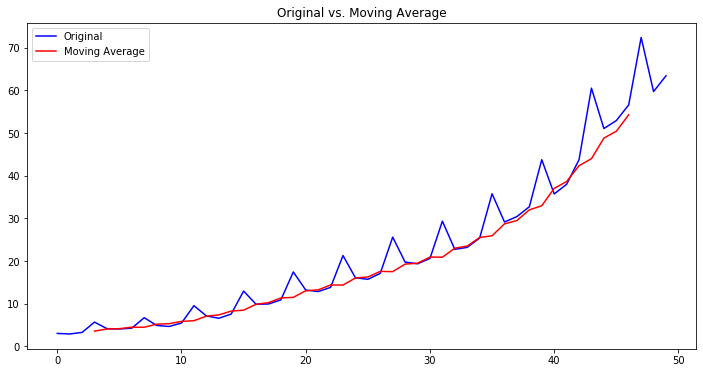

In [32]:
orig = plt.plot(rev_DF.Revs, color='blue', label='Original')
pred = plt.plot(test_DF.Quartal, test_DF.Revs, color='red', label='Moving Average')
plt.legend(loc='best')
plt.title('Original vs. Moving Average')
plt.show()

#### $\Delta t$ und Summe $\Delta t$

In [33]:
#t_array = test_DF.Quart.values.tolist()
t_array = range(1, len(moving_average_list))

delta_t_list, delta_t_power_liste, sum_delta_t_power_liste = delta_t(t_array)
#print(delta_t_list, delta_t_power_liste, sum_delta_t_power_liste)

#### $\Delta z$ und Summe $\Delta z$

In [34]:
z_array = test_DF.Revs.values.tolist()
#z_array = np.log(z_array)

delta_z_list = delta_z(z_array, exp=True)
#delta_z_list

#### $\Delta t \Delta z$ und Summe $\Delta t \Delta z$

In [35]:
delta_zt_liste, sum_delta_zt_liste = delta_z__delta_t(delta_t_list, delta_z_list)
#print(delta_zt_liste, sum_delta_zt_liste)

#### Parameter $a$ und $b$

In [36]:
a, b = calc_ab(np.log(z_array), t_array, delta_zt_liste, sum_delta_t_power_liste)
print(b, a)

0.060843189848590565 1.3542838464764335


#### Prognosewerte für die 1. bis letze Periode

In [37]:
#prediction_for_list = range(1,13)
prediction_for_list = range(1,len(test_DF.Revs) + 1)

prediction_list_MA = predict(a, b, prediction_for_list, exp=True)
#prediction_list_MA

#### DataFrame-Erweiterung und plotten der Prognosewerte  auf Basis MA

In [38]:
test_DF['Pred_MA'] = prediction_list_MA

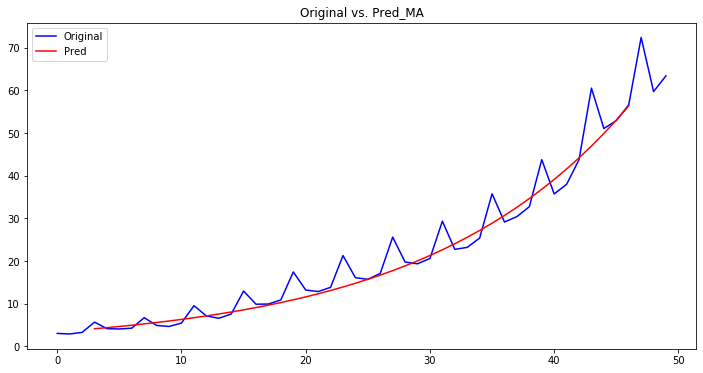

In [39]:
orig = plt.plot(rev_DF.Revs, color='blue', label='Original')
pred = plt.plot(test_DF.Quartal, test_DF.Pred_MA, color='red', label='Pred')
plt.legend(loc='best')
plt.title('Original vs. Pred_MA')
plt.show()

### Hinzufügen der Saisonkomponente

#### Residuen berechnen

In [40]:
residual_list = calc_residual(revenues, moving_average_list)
#residual_list

#### Saisonkomponenten berechnen

In [41]:
seasonal_components = get_seasonal_components(residual_list)
#seasonal_components

#### Saisonkomponente auf Moving-Average draufrechnen

In [42]:
ma_saison_list = add_saison(prediction_list_MA, seasonal_components)
#ma_saison_list

#### DataFrame-Erweiterung und plotten der Prognosewerte auf Basis MA + Saisonkomponente

In [43]:
test_DF['Pred_MA_Sasion'] = ma_saison_list

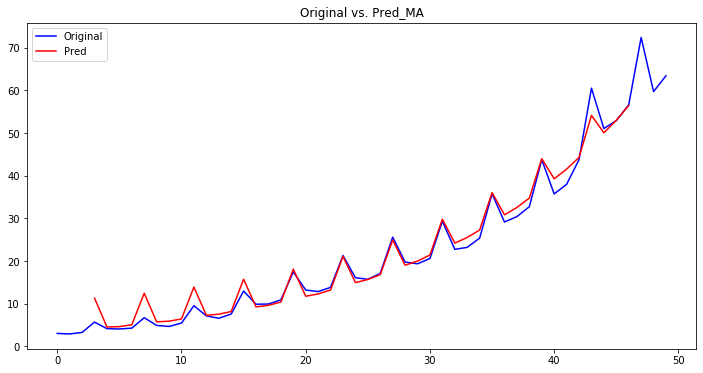

In [44]:
orig = plt.plot(rev_DF.Revs, color='blue', label='Original')
pred = plt.plot(test_DF.Quartal, test_DF.Pred_MA_Sasion, color='red', label='Pred')
plt.legend(loc='best')
plt.title('Original vs. Pred_MA')
plt.show()

### Bestimmtheitsmaß berechnen

In [45]:
z_array = rev_DF.Revs.values.tolist()
z_array = z_array[3:len(z_array) - 3]

r = r_power(z_array, ma_saison_list)
r

0.9438841841147938

## Prognose

In [46]:
prediction_for_list2 = range(1,55 + 1)
prediction_list_MA2 = predict(a, b, prediction_for_list2, exp=True)
#prediction_list_MA2

In [47]:
seasonal_components2 = seasonal_components[0:4] * 15
seasonal_components2 = seasonal_components2[0:len(prediction_list_MA2)]
#seasonal_components2

In [48]:
ma_saison_list2 = add_saison(prediction_list_MA2, seasonal_components2)
ma_saison_list2[50:]

[86.21478869722732,
 91.7737013845832,
 104.59136733620113,
 103.6782034564838,
 109.98132607718922]

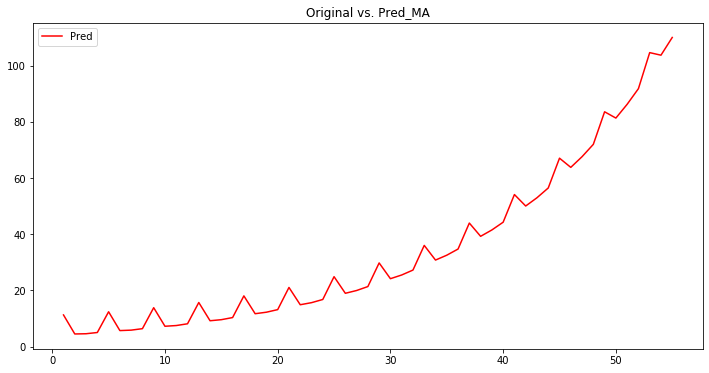

In [49]:
#orig = plt.plot(rev_DF.Revs, color='blue', label='Original')
pred = plt.plot(prediction_for_list2, ma_saison_list2, color='red', label='Pred')
plt.legend(loc='best')
plt.title('Original vs. Pred_MA')
plt.show()